In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


In [5]:
from subprocess import check_output


###**Importing data set**

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
train=pd.read_csv('/content/drive/MyDrive/data.csv')

###**To Find Null Value:**

In [8]:
pd.isnull(train)


,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9013,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9014,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9015,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


###**Shape and Columns:**

In [9]:
train = train.dropna()
print(train.shape)
print(list(train.columns))

(9017, 31)
['YEAR', 'MURDER', 'ATTEMPT TO MURDER', 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE', 'OTHER RAPE', 'KIDNAPPING & ABDUCTION', 'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS', 'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY', 'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT', 'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST', 'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT', 'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY', 'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES', 'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES']


###**Correlation:**

In [10]:
train.corr()
train.corr('kendall')
train.corr('spearman')

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
YEAR,1.000000,-0.045718,-0.009940,-0.000591,0.089243,-0.005781,0.089259,0.148914,0.193684,0.009473,...,-0.045664,0.003978,0.013266,0.026899,-0.062688,0.091090,0.004521,0.123994,0.038748,0.053551
MURDER,-0.045718,1.000000,0.782333,0.520857,0.692580,0.064833,0.692565,0.735816,0.670013,0.644775,...,0.542725,0.589238,0.707186,0.557871,0.360134,0.636175,0.161209,0.596026,0.615646,0.706437
ATTEMPT TO MURDER,-0.009940,0.782333,1.000000,0.468141,0.598116,0.058183,0.598117,0.682448,0.627751,0.617191,...,0.533159,0.593129,0.651426,0.586185,0.420470,0.577024,0.139724,0.537263,0.618110,0.692101
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,-0.000591,0.520857,0.468141,1.000000,0.421271,0.068927,0.421239,0.498685,0.466039,0.438005,...,0.180292,0.288290,0.544380,0.315296,0.302101,0.432299,0.126188,0.321546,0.310567,0.381971
RAPE,0.089243,0.692580,0.598116,0.421271,1.000000,0.065004,0.999997,0.650662,0.636193,0.497551,...,0.567856,0.589488,0.586633,0.735683,0.374224,0.706051,0.132094,0.533832,0.624953,0.698164
CUSTODIAL RAPE,-0.005781,0.064833,0.058183,0.068927,0.065004,1.000000,0.063478,0.063800,0.052735,0.065730,...,0.060179,0.064466,0.064385,0.055075,0.045443,0.059967,0.063839,0.067907,0.053548,0.065030
OTHER RAPE,0.089259,0.692565,0.598117,0.421239,0.999997,0.063478,1.000000,0.650649,0.636192,0.497532,...,0.567846,0.589471,0.586607,0.735692,0.374239,0.706053,0.132109,0.533799,0.624968,0.698150
KIDNAPPING & ABDUCTION,0.148914,0.735816,0.682448,0.498685,0.650662,0.063800,0.650649,1.000000,0.950101,0.755519,...,0.490719,0.494726,0.630708,0.517057,0.276609,0.697598,0.143829,0.588938,0.621108,0.698721
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,0.193684,0.670013,0.627751,0.466039,0.636193,0.052735,0.636192,0.950101,1.000000,0.576912,...,0.481175,0.488566,0.590189,0.538453,0.312114,0.696700,0.109745,0.597959,0.614085,0.680323
KIDNAPPING AND ABDUCTION OF OTHERS,0.009473,0.644775,0.617191,0.438005,0.497551,0.065730,0.497532,0.755519,0.576912,1.000000,...,0.376239,0.416771,0.536876,0.358847,0.203535,0.522566,0.161295,0.414446,0.473237,0.561245


###***Finding Head values:**

In [11]:
train.head()

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,2001,101,60,17,50,0,50,46,30,16,...,30,1131,16,149,34,175,0,181,1518,4154
1,2001,151,125,1,23,0,23,53,30,23,...,69,1543,7,118,24,154,0,270,754,4125
2,2001,101,57,2,27,0,27,59,34,25,...,38,2088,14,112,83,186,0,404,1262,5818
3,2001,80,53,1,20,0,20,25,20,5,...,23,795,17,126,38,57,0,233,1181,3140
4,2001,82,67,1,23,0,23,49,26,23,...,41,1244,12,109,58,247,0,431,2313,6507


###**Null Values:**

In [12]:
train.isnull().sum()
train.describe()

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
count,9017.000000,9017.00000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,...,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000
mean,2006.629034,89.28535,78.069646,9.895531,53.041366,0.005767,53.035599,79.152046,58.535433,20.616613,...,25.219918,747.893091,20.228901,100.511257,27.515582,194.122435,0.197849,222.216702,2174.299434,5310.115116
std,3.463623,327.27503,303.446020,59.521657,190.741450,0.115223,190.725474,317.630964,246.937464,88.586415,...,98.880282,3024.106467,96.970466,394.059436,167.237522,831.986594,2.415039,936.002540,7988.438462,18524.381119
min,2001.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,18.00000,10.000000,0.000000,8.000000,0.000000,8.000000,10.000000,6.000000,1.000000,...,2.000000,43.000000,1.000000,10.000000,0.000000,11.000000,0.000000,5.000000,265.000000,853.000000
50%,2007.000000,38.00000,28.000000,2.000000,20.000000,0.000000,20.000000,25.000000,18.000000,5.000000,...,8.000000,199.000000,5.000000,31.000000,2.000000,47.000000,0.000000,68.000000,745.000000,2096.000000
75%,2010.000000,66.00000,56.000000,6.000000,41.000000,0.000000,41.000000,56.000000,42.000000,13.000000,...,20.000000,529.000000,16.000000,76.000000,13.000000,135.000000,0.000000,177.000000,1608.000000,3972.000000
max,2012.000000,7601.00000,7964.000000,1616.000000,3425.000000,5.000000,3425.000000,8878.000000,7910.000000,2416.000000,...,2830.000000,56768.000000,2322.000000,7118.000000,4970.000000,19865.000000,83.000000,16076.000000,124176.000000,220335.000000


###**Identify dataset Types:**

In [13]:
train.dtypes

YEAR                                                   int64
MURDER                                                 int64
ATTEMPT TO MURDER                                      int64
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              int64
RAPE                                                   int64
CUSTODIAL RAPE                                         int64
OTHER RAPE                                             int64
KIDNAPPING & ABDUCTION                                 int64
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            int64
KIDNAPPING AND ABDUCTION OF OTHERS                     int64
DACOITY                                                int64
PREPARATION AND ASSEMBLY FOR DACOITY                   int64
ROBBERY                                                int64
BURGLARY                                               int64
THEFT                                                  int64
AUTO THEFT                                             int64
OTHER THEFT             

###**Countplot:**

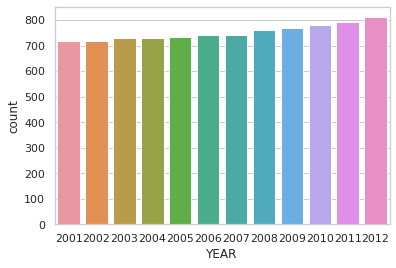

In [14]:
sns.countplot(x='YEAR', data=train);

In [15]:
pd.Categorical(train)

['YEAR', 'MURDER', 'ATTEMPT TO MURDER', 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', ..., 'CRUELTY BY HUSBAND OR HIS RELATIVES', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES', 'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES']
Length: 31
Categories (31, object): ['ARSON', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER M...,
                          'ATTEMPT TO MURDER', 'AUTO THEFT', ..., 'ROBBERY', 'THEFT', 'TOTAL IPC CRIMES',
                          'YEAR']

In [16]:
X = train.drop(['RAPE'], axis=1)
y = train["RAPE"]

In [17]:
print (X.head(1))
print (y.head(1))

   YEAR  MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  \
0  2001     101                 60                                         17   

   CUSTODIAL RAPE  OTHER RAPE  KIDNAPPING & ABDUCTION  \
0               0          50                      46   

   KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS  \
0                                           30   

   KIDNAPPING AND ABDUCTION OF OTHERS  DACOITY  ...  ARSON  \
0                                  16        9  ...     30   

   HURT/GREVIOUS HURT  DOWRY DEATHS  \
0                1131            16   

   ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
0                                                149     

   INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                          34                                  175   

   IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  CAUSING DEATH BY NEGLIGENCE  \
0                                            0                          181   



In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = .33, random_state = 1)

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score,classification_report, precision_recall_curve,confusion_matrix
from sklearn.metrics import confusion_matrix

###**GaussianNB Classifer:**

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_test)
gaussian_accy = round(accuracy_score(y_pred, y_test), 3)
print(gaussian_accy)

0.929


###**KneighborsClassifier:**

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(weights="uniform", )
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
knn_accy = round(accuracy_score(y_test, y_pred), 3)
print (knn_accy)


0.075


###**Support vector Classifer:**

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
svc_accy = round(accuracy_score(y_pred, y_test), 3)
print(svc_accy) 

###**DecisionTreeClassifier:**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier( max_depth=5, class_weight = 'balanced',
min_weight_fraction_leaf = 0.01)
dectree.fit(x_train, y_train)
y_pred = dectree.predict(x_test)
dectree_accy = round(accuracy_score(y_pred, y_test), 3)
print(dectree_accy)
